In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
angle = pd.read_csv('angle.csv')

(0.0, 30.0)

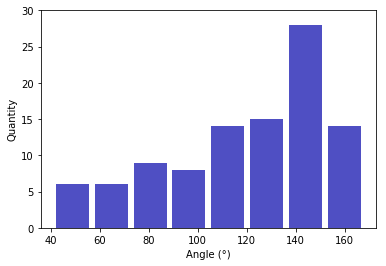

In [12]:
n, bins, patches = plt.hist(angle.Angle, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angle (°)')
plt.ylabel('Quantity')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
#plt.savefig("angle2.png")

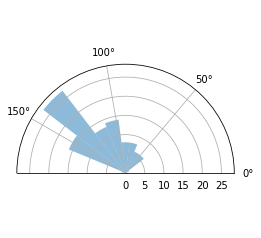

In [63]:
bins_number = 24  # the [0, 360) interval will be subdivided into this
# number of equal bins
bins = np.linspace(0.0, 2 * np.pi, bins_number + 1)
angles = angle.Angle.values *np.pi/180
n, _, _ = plt.hist(angles, bins)

plt.clf()
width = 2 * np.pi / bins_number
ax = plt.subplot(1, 1, 1, projection='polar')
bars = ax.bar(bins[:bins_number], n, width=width, bottom=0.0)

ax.set_thetamin(0)
ax.set_thetamax(180)

for bar in bars:
    bar.set_alpha(0.5)
plt.show()



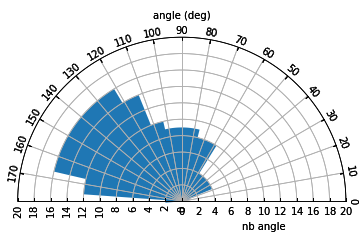

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.floating_axes import GridHelperCurveLinear, FloatingSubplot
import mpl_toolkits.axisartist.grid_finder as gf


def generate_polar_axes():
    polar_trans = PolarAxes.PolarTransform()

    # Setup the axis, here we map angles in degrees to angles in radius
    phi_degree = np.arange(0, 180, 10)
    tlocs = phi_degree * np.pi / 180
    gl1 = gf.FixedLocator(tlocs)  # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, phi_degree))))

    # Standard deviation axis extent
    radius_min = 0
    radius_max = 20

    # Set up the axes range in the parameter "extremes"
    ghelper = GridHelperCurveLinear(polar_trans, extremes=(0, np.pi,  # 1st quadrant
                                                           radius_min, radius_max),
                                    grid_locator1=gl1,
                                    tick_formatter1=tf1,
                                    )

    figure = plt.figure()

    floating_ax = FloatingSubplot(figure, 111, grid_helper=ghelper)
    figure.add_subplot(floating_ax)

    # Adjust axes
    floating_ax.axis["top"].set_axis_direction("bottom")  # "Angle axis"
    floating_ax.axis["top"].toggle(ticklabels=True, label=True)
    floating_ax.axis["top"].major_ticklabels.set_axis_direction("top")
    floating_ax.axis["top"].label.set_axis_direction("top")
    floating_ax.axis["top"].label.set_text("angle (deg)")

    floating_ax.axis["left"].set_axis_direction("bottom")  # "X axis"
    floating_ax.axis["left"].label.set_text("nb angle")

    floating_ax.axis["right"].set_axis_direction("top")  # "Y axis"
    floating_ax.axis["right"].toggle(ticklabels=True)
    floating_ax.axis["right"].major_ticklabels.set_axis_direction("left")

    floating_ax.axis["bottom"].set_visible(False)  # Useless

    # Contours along standard deviations
    floating_ax.grid(True)
    #floating_ax.set_title("Quarter polar plot")

    data_ax = floating_ax.get_aux_axes(polar_trans)  # return the axes that can be plotted on

    return figure, data_ax


    
# Plot data onto the defined polar axes
fig, ax = generate_polar_axes()


ax.bar(bins[:bins_number], n)

fig.savefig("test.png")